In [1]:
import pandas as pd
import numpy as np
from sklearn import neighbors, datasets
from sklearn.model_selection import KFold
nb_classes = 4
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

In [2]:
# data_processed.csv
# load dataset
df = pd.read_csv('data_processed.csv')
# Get testSet
df_test = df.sample(frac=0.2, random_state=18)
df_test.to_csv('testSet.csv', index=False)
# Subtract to get trainingSet
df_train = df[~df.index.isin(df_test.index)]
df_train.to_csv('trainingSet.csv', index=False)

In [3]:
trainingSet = pd.read_csv('trainingSet.csv').sample(frac = 1, random_state=18)
testSet = pd.read_csv('testSet.csv').sample(frac = 1, random_state=18)

In [4]:
Y = np.array(trainingSet['Value'])
trainSet_X = trainingSet.drop('Value', axis=1)
X = np.array(trainSet_X)

In [5]:
# Y_test = np.array(testSet['Value'])
# testSet_X = testSet.drop('Value', axis=1)
# X_test = np.array(testSet_X)
# Y_test = Y_test - [1]

kf = KFold(n_splits=5)
kf.get_n_splits(X)
# K = [1,2,5,10,15,20,25,30,35,40,45,50]
K = [1,2,3,4,5,6,7,8,9,10,13,15,20,25]

train_dict = {}
test_dict = {}

for k in K:
    train_dict[k] = []
    test_dict[k] = []
    print 'k = ', k
    fold = 1
    for train_index, test_index in kf.split(X):
#         if fold == 5:
#             break
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        print Y_test
        # Learn the classifier
#         clf = neighbors.KNeighborsClassifier(k, weights='uniform')
        clf = neighbors.KNeighborsClassifier(k, weights='distance')

        clf.fit(X_train, Y_train)
        
#         Y_test = np.array(testSet['Value'])
#         testSet_X = testSet.drop('Value', axis=1)
#         X_test = np.array(testSet_X)
        
        # CV Result
        train_res = clf.predict(X_train)
        test_res = clf.predict(X_test)
        
        # Get train accuracy
        count = 0
        for i in range((len(X_train))):
            if train_res[i] == Y_train[i]:
                count += 1
        train_dict[k].append(1.0 * count/len(X_train))
        print 1.0 * count/len(X_train)
                             
        # Get test accuracy
        count = 0
        for i in range((len(X_test))):
            if test_res[i] == Y_test[i]:
                count += 1
        test_dict[k].append(1.0 * count/len(X_test))
        print 1.0 * count/len(X_test)
        fold += 1

k =  1
[1 2 1 1 1 1 3 1 1 1 2 2 1 1 2 4 1 3 1 2 1 1 2 1 1 1 1 1 1 1 1 1 4 4 1 2 1
 1 1 1 2 1 1 1 1 3 1 1 2 3 2 3 1 3 2 1 1 1 1 2 2 1 1 1 1 1 3 1 2 1 1 1 1 1
 2 2 2 2 2 1 4 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1
 2 2 2 1 1 2 1 1 1 1 2 1 1 3 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1
 1 1 1 1 2 3 1 2 1 1 1 3 2 4 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 1 1 2 3 3 1 1 2 1 1 1 1 2 1 2 1 1 1 1 2 2 1 1 1 3 1 3 1 1 1 2
 4 1 2 1 1 1 2]
1.0
0.825327510917
[2 3 4 1 1 1 1 1 1 1 2 2 1 4 1 3 1 2 1 1 2 1 1 2 1 2 1 3 1 1 2 2 1 2 1 2 2
 1 1 1 3 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 3 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1
 3 1 2 3 2 1 1 1 1 1 1 1 4 2 1 1 2 3 3 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 4 2 2 1 1 1 2 1 1 1 1 1 1 1
 1 1 2 1 2 2 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1 1 3 1 2 1 1 1 1 1 1 3 1 2 1 1 2
 4 1 1 1 1 2 1 1 1 1 1 1 1 3 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 4 1 1 1 1
 1 1 1 1 1 1]
1.0
0.837719298246
[1 1 1 1 1 1 1 1 1 1 1 1 

1.0
0.855263157895
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 2 1 1 1 3 2 1 2 1 1 1
 4 2 2 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1
 4 1 2 2 1 3 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 4 1 1 1 1 1 2
 2 2 3 1 2 1 3 1 1 2 1 1 1 1 1 1 1 1 1 1 2 3 3 1 1 1 1 1 1 1 4 1 2 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 2 1 1 3 1 1 1 2 1 4 1 1 1 3 1 1 1 1 1 1 1 2 1 1 2 1 2
 1 1 2 2 1 2 3 2 1 1 1 1 1 2 2 1 3 2 1 1 3 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1
 1 4 2 1 1 2]
1.0
0.868421052632
[1 1 1 1 1 1 4 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 3 1 1 2 1 3 1 1 1 1 2 3 1
 2 1 1 1 1 3 2 3 1 1 3 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 3 1 1 1 1 2 1 2 1 1 1
 2 1 1 1 1 2 1 2 2 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 2 1 3 1 1 1 1 2 2 1
 2 1 1 1 1 4 1 3 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 1 1 1 1 2
 1 1 1 1 1 1 2 2 2 3 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 4 1 2 1 1 1 1 1 1 1 1
 1 1 1 2 1 1]
1.0
0.899122807018
[1 1 3 1 2 1 1 

1.0
0.894736842105
[1 1 3 1 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 3 1 3 1 1 4 3 3 1 1 2 2 1 1
 2 1 1 3 2 1 2 2 1 1 2 1 3 3 1 3 2 2 1 1 2 2 2 1 1 2 1 1 4 2 1 1 2 1 2 1 1
 2 1 2 1 2 1 2 2 2 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 3 2 1 1 2 2 2 3 1 4 2 1 1
 2 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 4 1 2 2 1 1 2 2 1 1 1 1 1
 4 3 2 2 4 1 3 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 3 4 1 1 2 1 2 1
 1 1 2 1 2 1 2 1 1 2 1 4 1 2 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 2 1 1 2 1 1 1 2
 1 1 1 1 2 1]
1.0
0.820175438596
k =  8
[1 2 1 1 1 1 3 1 1 1 2 2 1 1 2 4 1 3 1 2 1 1 2 1 1 1 1 1 1 1 1 1 4 4 1 2 1
 1 1 1 2 1 1 1 1 3 1 1 2 3 2 3 1 3 2 1 1 1 1 2 2 1 1 1 1 1 3 1 2 1 1 1 1 1
 2 2 2 2 2 1 4 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1
 2 2 2 1 1 2 1 1 1 1 2 1 1 3 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1
 1 1 1 1 2 3 1 2 1 1 1 3 2 4 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 1 1 2 3 3 1 1 2 1 1 1 1 2 1 2 1 1 1 1 2 2 1 1 1 3 1 3 1 1 1 2
 4 1 2 1 1 1 2]
1.0
0.838427947598
[2 3 4

1.0
0.855895196507
[2 3 4 1 1 1 1 1 1 1 2 2 1 4 1 3 1 2 1 1 2 1 1 2 1 2 1 3 1 1 2 2 1 2 1 2 2
 1 1 1 3 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 3 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1
 3 1 2 3 2 1 1 1 1 1 1 1 4 2 1 1 2 3 3 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 4 2 2 1 1 1 2 1 1 1 1 1 1 1
 1 1 2 1 2 2 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1 1 3 1 2 1 1 1 1 1 1 3 1 2 1 1 2
 4 1 1 1 1 2 1 1 1 1 1 1 1 3 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 4 1 1 1 1
 1 1 1 1 1 1]
1.0
0.855263157895
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 2 1 1 1 3 2 1 2 1 1 1
 4 2 2 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1
 4 1 2 2 1 3 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 4 1 1 1 1 1 2
 2 2 3 1 2 1 3 1 1 2 1 1 1 1 1 1 1 1 1 1 2 3 3 1 1 1 1 1 1 1 4 1 2 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 2 1 1 3 1 1 1 2 1 4 1 1 1 3 1 1 1 1 1 1 1 2 1 1 2 1 2
 1 1 2 2 1 2 3 2 1 1 1 1 1 2 2 1 3 2 1 1 3 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1
 1 4 2 1 1 2]
1.0
0.859649122807
[1 1 1 1 1 1 4 

1.0
0.855263157895
[1 1 1 1 1 1 4 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 3 1 1 2 1 3 1 1 1 1 2 3 1
 2 1 1 1 1 3 2 3 1 1 3 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 3 1 1 1 1 2 1 2 1 1 1
 2 1 1 1 1 2 1 2 2 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 2 1 3 1 1 1 1 2 2 1
 2 1 1 1 1 4 1 3 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 1 1 1 1 2
 1 1 1 1 1 1 2 2 2 3 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 4 1 2 1 1 1 1 1 1 1 1
 1 1 1 2 1 1]
1.0
0.868421052632
[1 1 3 1 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 3 1 3 1 1 4 3 3 1 1 2 2 1 1
 2 1 1 3 2 1 2 2 1 1 2 1 3 3 1 3 2 2 1 1 2 2 2 1 1 2 1 1 4 2 1 1 2 1 2 1 1
 2 1 2 1 2 1 2 2 2 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 3 2 1 1 2 2 2 3 1 4 2 1 1
 2 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 4 1 2 2 1 1 2 2 1 1 1 1 1
 4 3 2 2 4 1 3 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 3 4 1 1 2 1 2 1
 1 1 2 1 2 1 2 1 1 2 1 4 1 2 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 2 1 1 2 1 1 1 2
 1 1 1 1 2 1]
1.0
0.780701754386


In [6]:
print train_dict
print test_dict

train_accuracy = []
train_stdrr = []
test_accuracy = []
test_stdrr = []
for k in K:
    train_accuracy.append(np.mean(train_dict[k]))
    train_stdrr.append(np.std(train_dict[k]) / np.sqrt(5))
    test_accuracy.append(np.mean(test_dict[k]))
    test_stdrr.append(np.std(test_dict[k]) / np.sqrt(5))
print train_accuracy
print train_stdrr
print test_accuracy
print test_stdrr

{1: [1.0, 1.0, 1.0, 1.0, 1.0], 2: [1.0, 1.0, 1.0, 1.0, 1.0], 3: [1.0, 1.0, 1.0, 1.0, 1.0], 4: [1.0, 1.0, 1.0, 1.0, 1.0], 5: [1.0, 1.0, 1.0, 1.0, 1.0], 6: [1.0, 1.0, 1.0, 1.0, 1.0], 7: [1.0, 1.0, 1.0, 1.0, 1.0], 8: [1.0, 1.0, 1.0, 1.0, 1.0], 9: [1.0, 1.0, 1.0, 1.0, 1.0], 10: [1.0, 1.0, 1.0, 1.0, 1.0], 13: [1.0, 1.0, 1.0, 1.0, 1.0], 15: [1.0, 1.0, 1.0, 1.0, 1.0], 20: [1.0, 1.0, 1.0, 1.0, 1.0], 25: [1.0, 1.0, 1.0, 1.0, 1.0]}
{1: [0.8253275109170306, 0.8377192982456141, 0.8508771929824561, 0.8596491228070176, 0.7894736842105263], 2: [0.834061135371179, 0.8421052631578947, 0.8552631578947368, 0.868421052631579, 0.7850877192982456], 3: [0.8296943231441049, 0.8728070175438597, 0.868421052631579, 0.8728070175438597, 0.8201754385964912], 4: [0.834061135371179, 0.8552631578947368, 0.868421052631579, 0.8991228070175439, 0.8114035087719298], 5: [0.8427947598253275, 0.881578947368421, 0.8596491228070176, 0.8903508771929824, 0.8201754385964912], 6: [0.8427947598253275, 0.868421052631579, 0.850877192

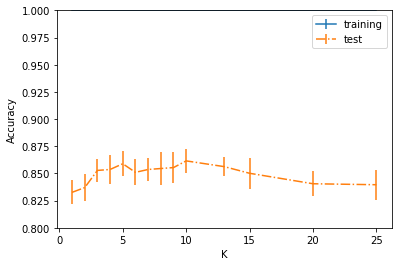

In [7]:
plt.figure()
plt.errorbar(K, train_accuracy, train_stdrr, label='training', linestyle='-')
plt.errorbar(K, test_accuracy, test_stdrr, label='test', linestyle='-.')
plt.ylim((0.80, 1.00))
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.legend()
plt.savefig('./KNN-distance.pdf')
plt.show()